========================= PT. 2 ===========================

# EXPLORATORY DATA ANALYSIS (EDA)
===========================================================

#### Plot Labels

In [33]:
train_final['damage_group'] = train_final['damage_grade'].replace({1:'Low', 2:'Medium', 3:'High'})

#### Detect Outliers

<AxesSubplot:xlabel='foundation_type', ylabel='age'>

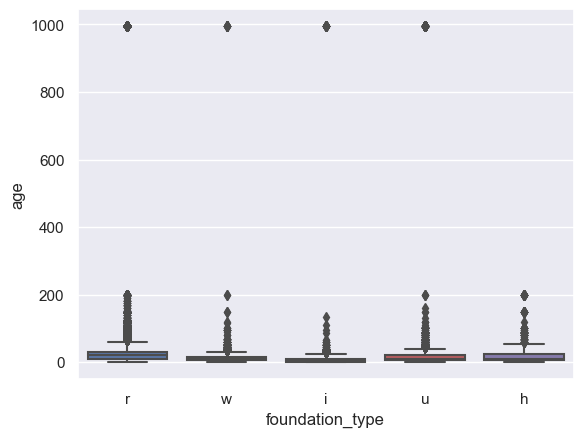

In [34]:
sb.boxplot(x='foundation_type',y ='age',data=building_damage)

#### Plot graph with age <= 250

<AxesSubplot:xlabel='foundation_type', ylabel='age'>

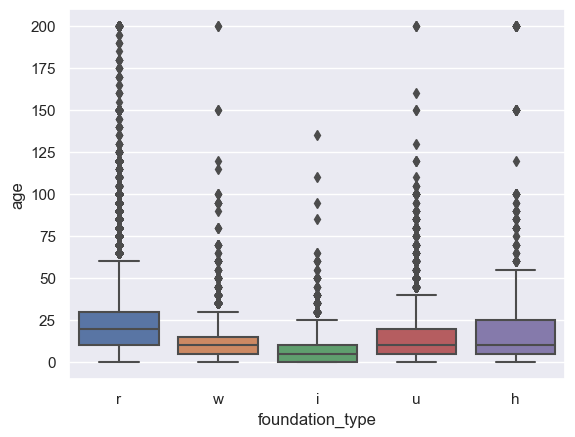

In [35]:

df = building_damage[building_damage['age'] <= 250]
sb.boxplot(x='foundation_type',y ='age',data=df)

#### Plot Damage Grade

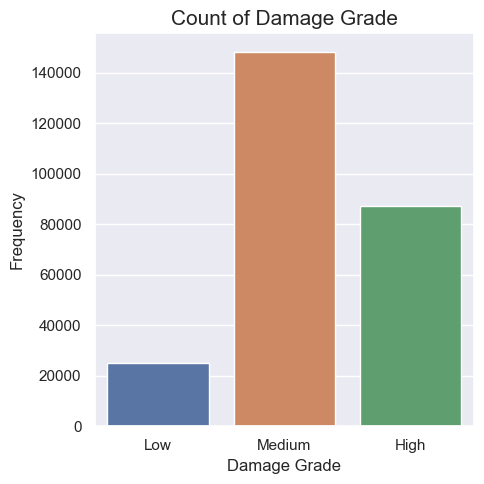

In [36]:
plt.figure(figsize=(5,5))

sb.set_theme()
sb.countplot(data = train_final, x ='damage_group', order=['Low', 'Medium', 'High'])
plt.xlabel('Damage Grade', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Count of Damage Grade', fontsize=15)
plt.tight_layout()
plt.show()

#### Summary

In [37]:
print('Number of building with Low Damage level: {}'.format(sum(train_final['damage_group']=='Low')))
print('Number of building with Medium Damage level: {}'.format(sum(train_final['damage_group']=='Medium')))
print('Number of building with High Damage level: {}'.format(sum(train_final['damage_group']=='High')))
print('')
print('Percentage of building with Low Damage Level: {:.2f}%'.format(sum(train_final['damage_group']=='Low')/train_final.shape[0]*100))
print('Percentage of building with Medium Damage Level: {:.2f}%'.format(sum(train_final['damage_group']=='Medium')/train_final.shape[0]*100))
print('Percentage of building with High Damage Level: {:.2f}%'.format(sum(train_final['damage_group']=='High')/train_final.shape[0]*100))

Number of building with Low Damage level: 25124
Number of building with Medium Damage level: 148259
Number of building with High Damage level: 87218

Percentage of building with Low Damage Level: 9.64%
Percentage of building with Medium Damage Level: 56.89%
Percentage of building with High Damage Level: 33.47%


In [38]:
train = train_final

### CORRELATIONS

MATRIX

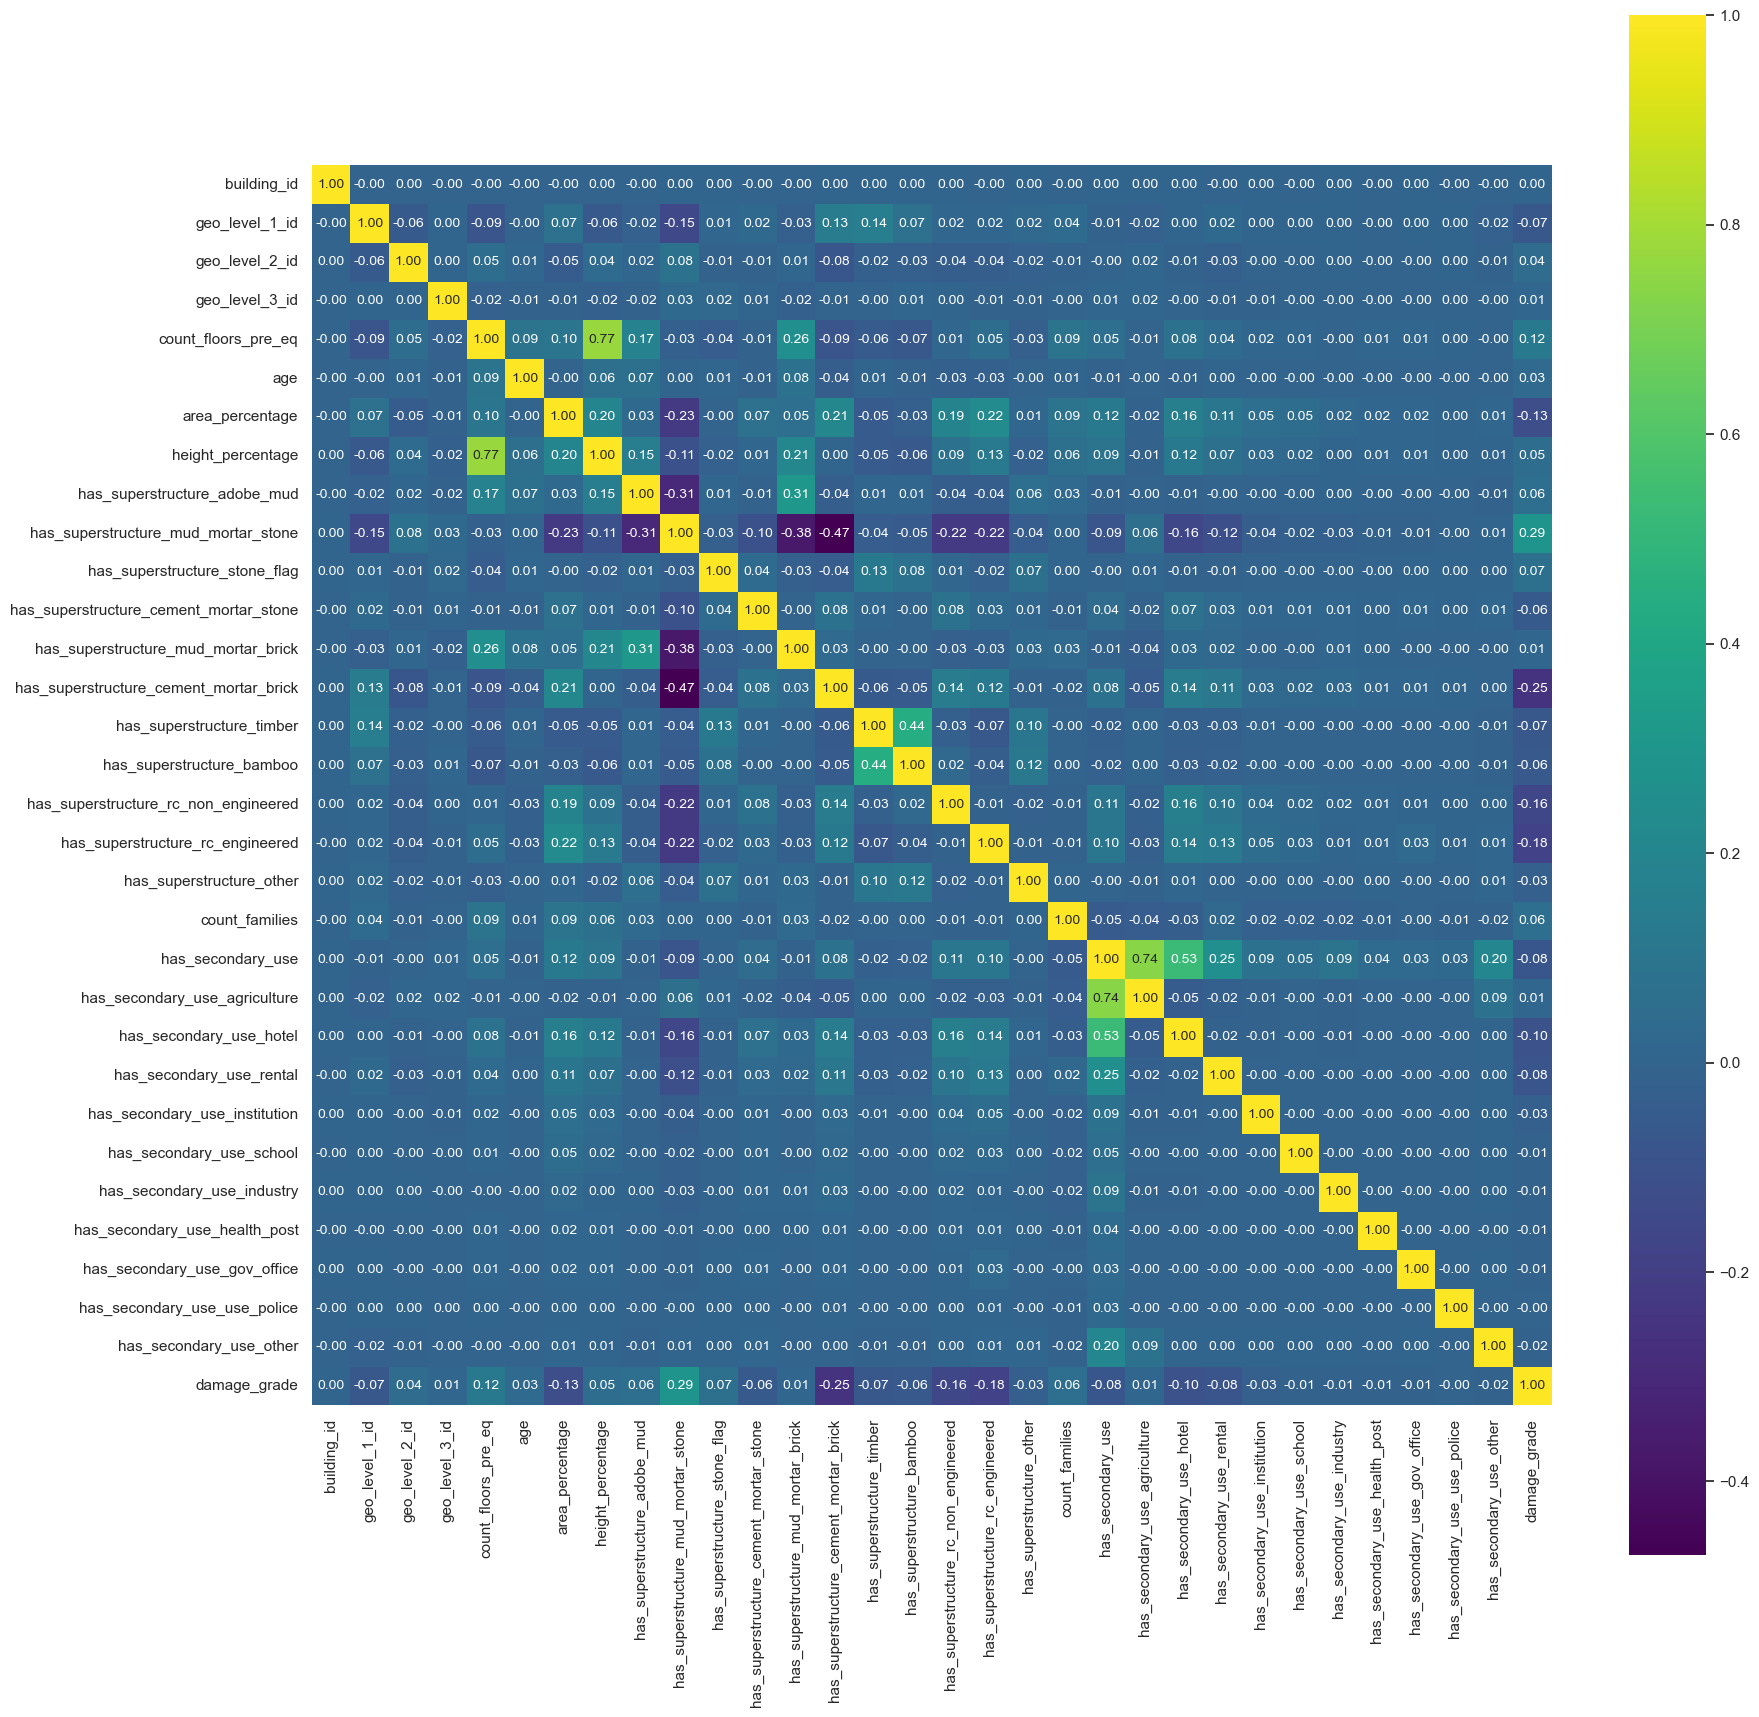

In [39]:
features = building_damage.copy()
features['damage_grade'] = features['damage_grade'].astype('int64')
corr_matrix = features.corr()
plt.figure(figsize=(20,20))

fig = sb.heatmap(corr_matrix, annot=True, cmap='viridis', square=True, fmt='.2f', annot_kws={'size': 10}).get_figure()
plt.show()
fig.savefig('heatmap.jpg')

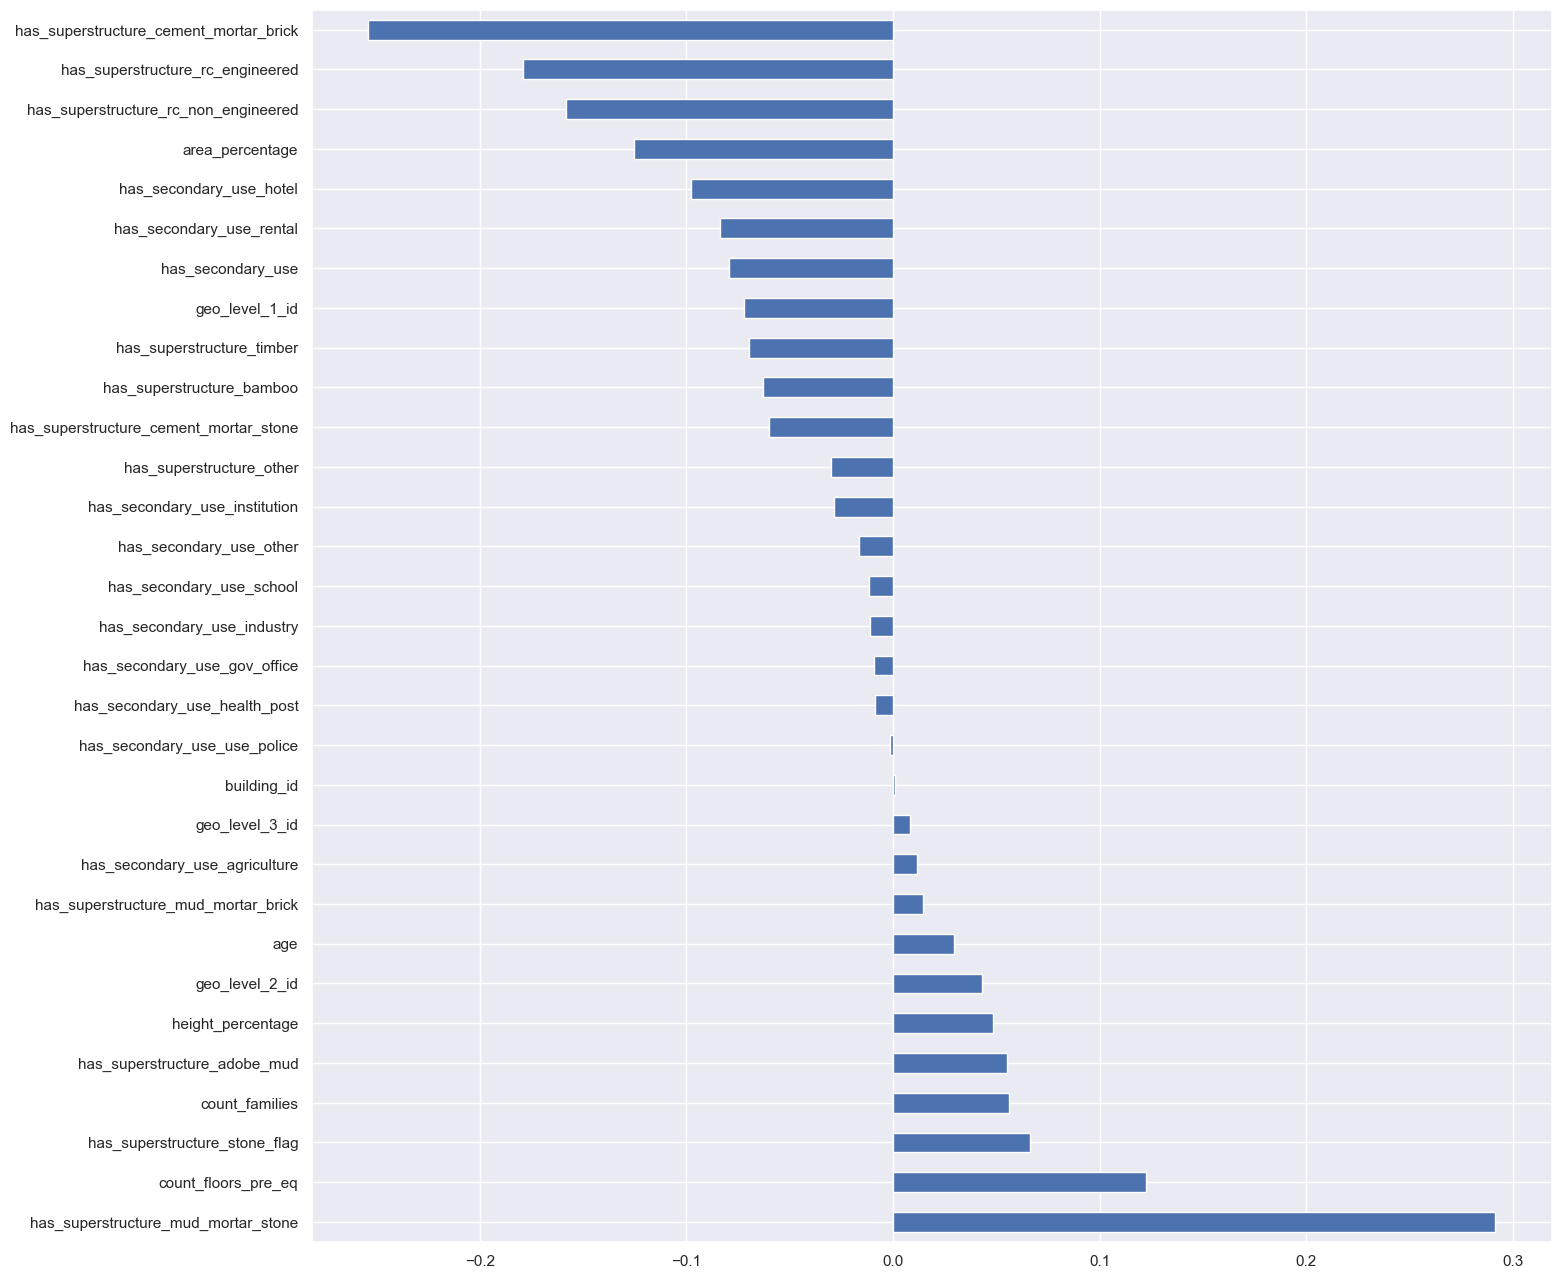

In [40]:
plt.figure(figsize=(16,16))

corr_matrix['damage_grade'].drop('damage_grade').sort_values(ascending=False).plot(kind='barh')
plt.show()

### Between Variables

##### Number of Floor and Count Families and Damage Grade

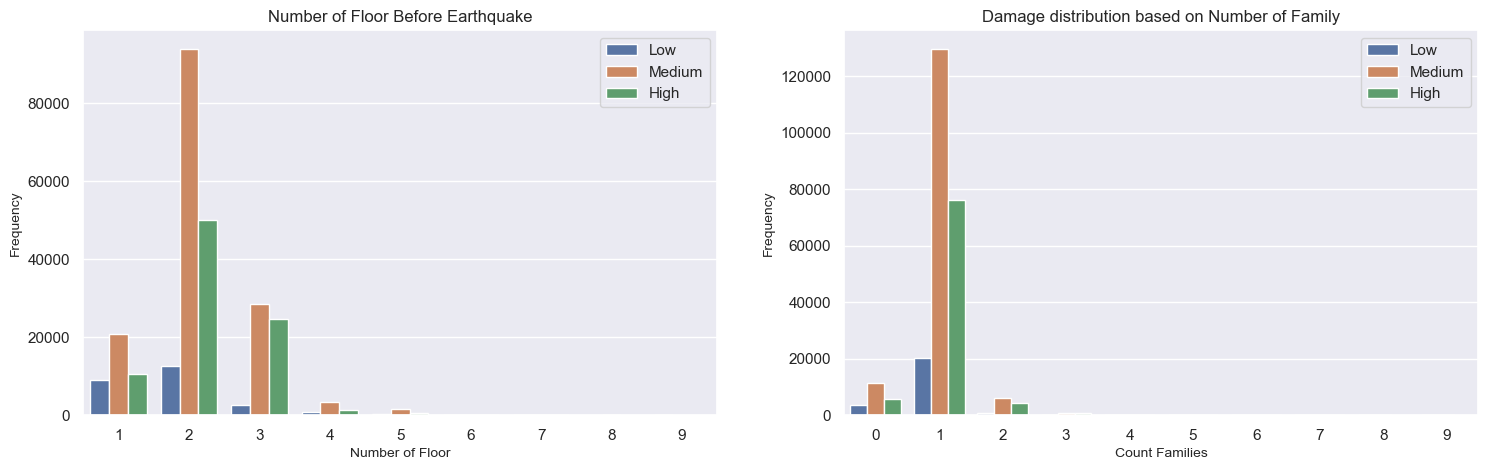

In [41]:

fig = plt.figure(figsize=(18,5))

floor_family_col = ['count_floors_pre_eq', 'count_families']
floor_family_label = ['Number of Floor', 'Count Families']
floor_family_title = ['Number of Floor Before Earthquake', 'Damage distribution based on Number of Family']

for i in range(1,3):
    plt.subplot(int(f'12{i}'))
    sb.countplot(data = train, x = floor_family_col[i-1], hue=train['damage_group'], hue_order=['Low', 'Medium', 'High'])
    plt.xlabel(f'{floor_family_label[i-1]}', fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.title(f'{floor_family_title[i-1]}')
    plt.legend(loc='upper right')
plt.show()

#### Geo Level & Damage Grade

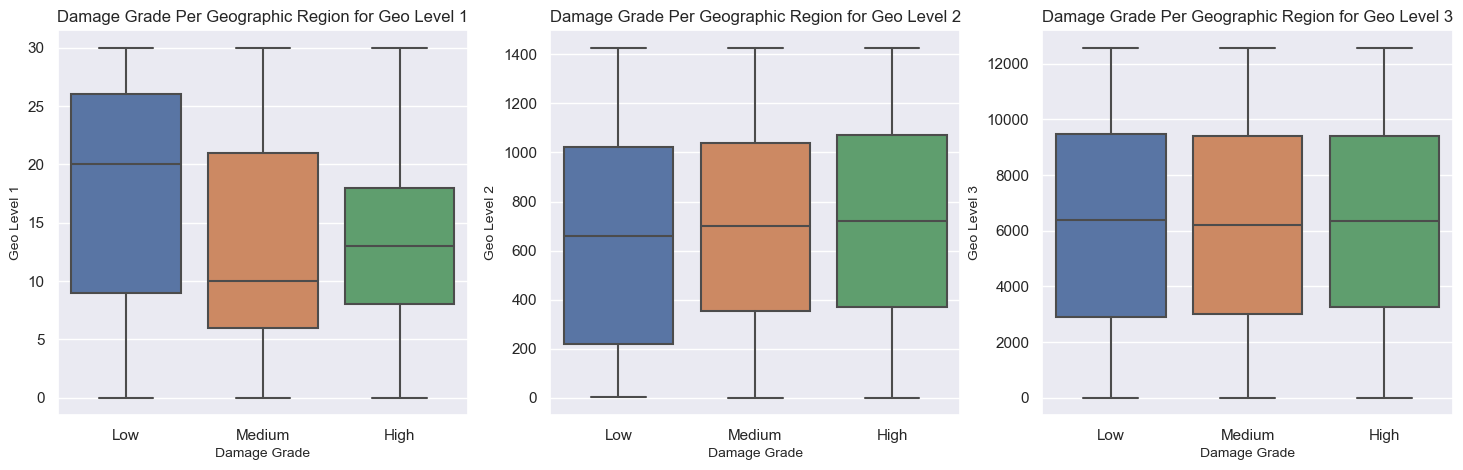

In [42]:
fig = plt.figure(figsize=(18,5))

geo_col = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id']

for i in range(1,4):
    plt.subplot(int(f'13{i}'))
    sb.boxplot(data = train,x = 'damage_group',y = geo_col[i-1], order=['Low', 'Medium', 'High'])
    plt.xlabel('Damage Grade', fontsize=10)
    plt.ylabel(f'Geo Level {i}', fontsize=10)
    plt.title(f'Damage Grade Per Geographic Region for Geo Level {i}')
plt.show()

#### Age & Damage Grade

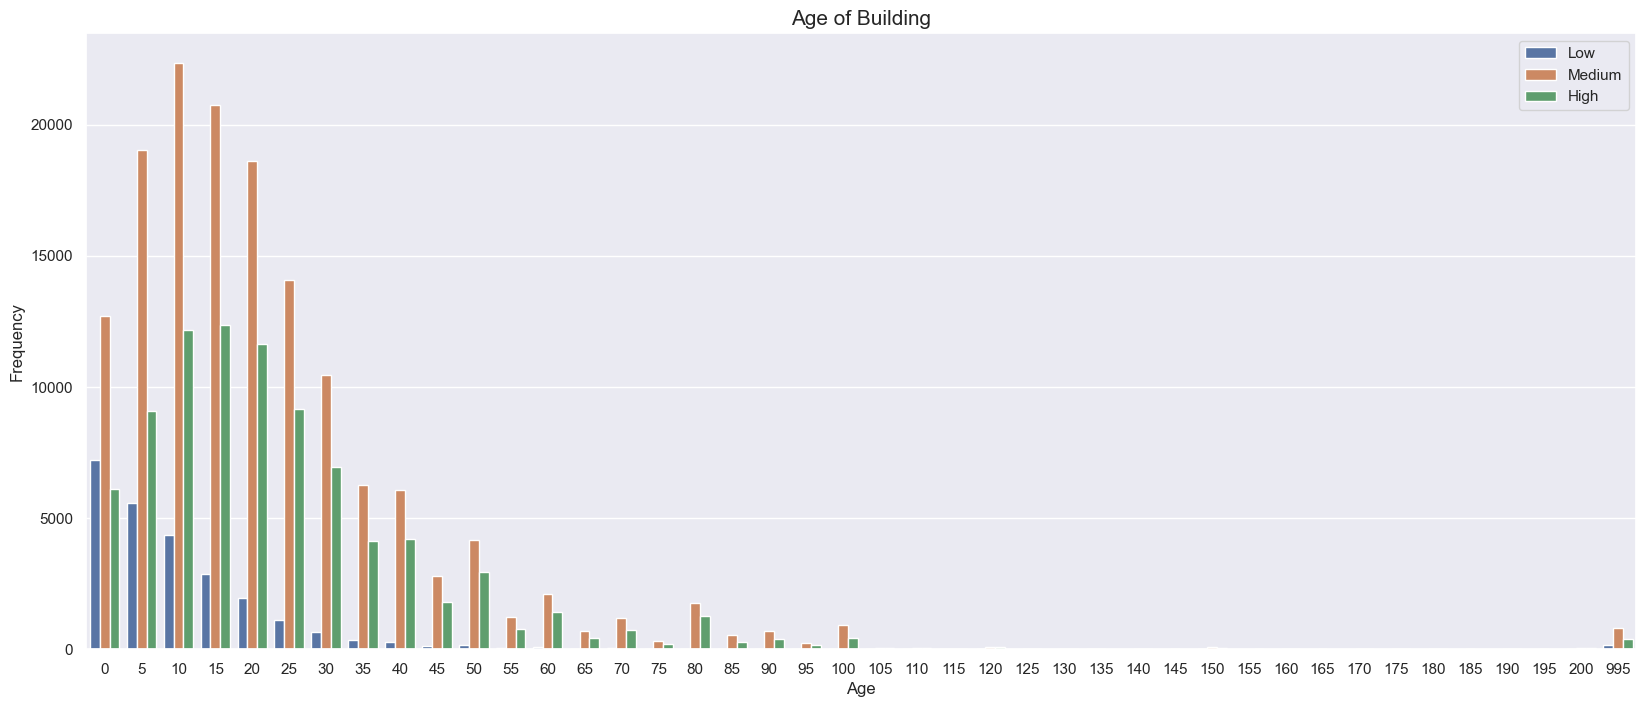

In [43]:
plt.figure(figsize=(20,8))

sb.countplot(data = train, x = 'age', hue=train['damage_group'], hue_order=['Low', 'Medium', 'High'])
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Age of Building', fontsize=15)
plt.legend(loc='upper right')
plt.show()

We divide the age into 4 segments, each with 50 years range

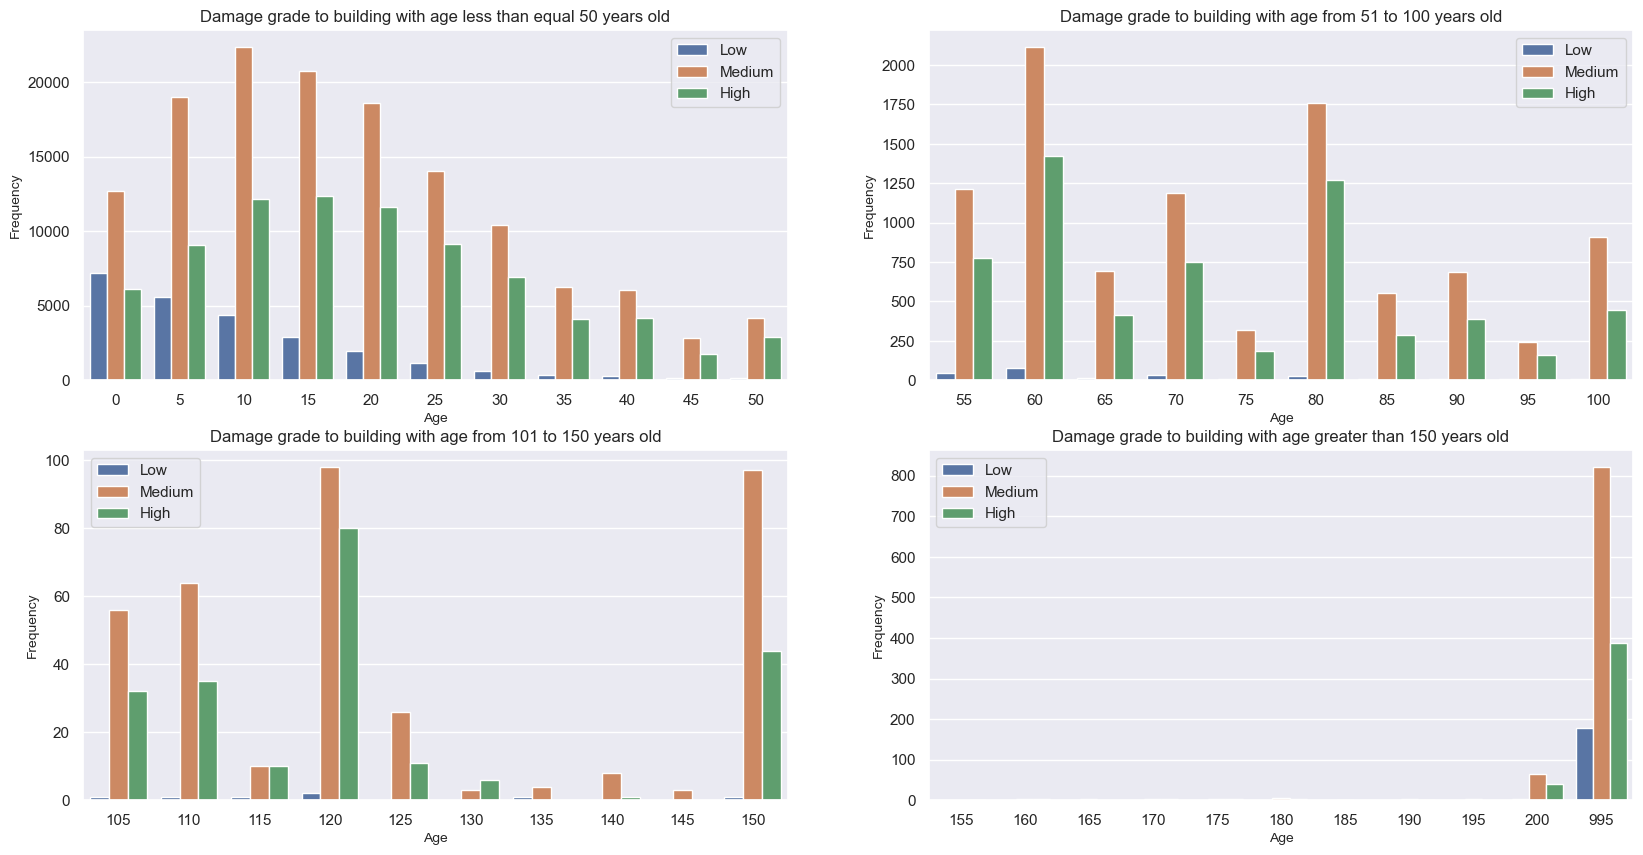

In [44]:
fig = plt.figure(figsize=(20,10))

segment_1_age = train[train['age']<=50]
segment_2_age = train[(train['age']>50) & (train['age']<=100)]
segment_3_age = train[(train['age']>100) & (train['age']<=150)]
segment_4_age = train[train['age']>150]


segment = [segment_1_age, segment_2_age, segment_3_age, segment_4_age]
segment_title = ['less than equal 50 years old', 'from 51 to 100 years old',
                 'from 101 to 150 years old', 'greater than 150 years old']
segment_legend_loc = ['upper right', 'upper right', 'upper left', 'upper left']

for i in range(1,5):
    plt.subplot(int(f'22{i}'))
    sb.countplot(data = train, x = segment[i-1]['age'], hue=segment[i-1]['damage_group'], hue_order=['Low', 'Medium', 'High'])
    plt.xlabel('Age', fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.title(f'Damage grade to building with age {segment_title[i-1]}', fontsize=12)
    plt.legend(loc=segment_legend_loc[i-1])
plt.show()

#### Area and Height Percentage & Damage Grade

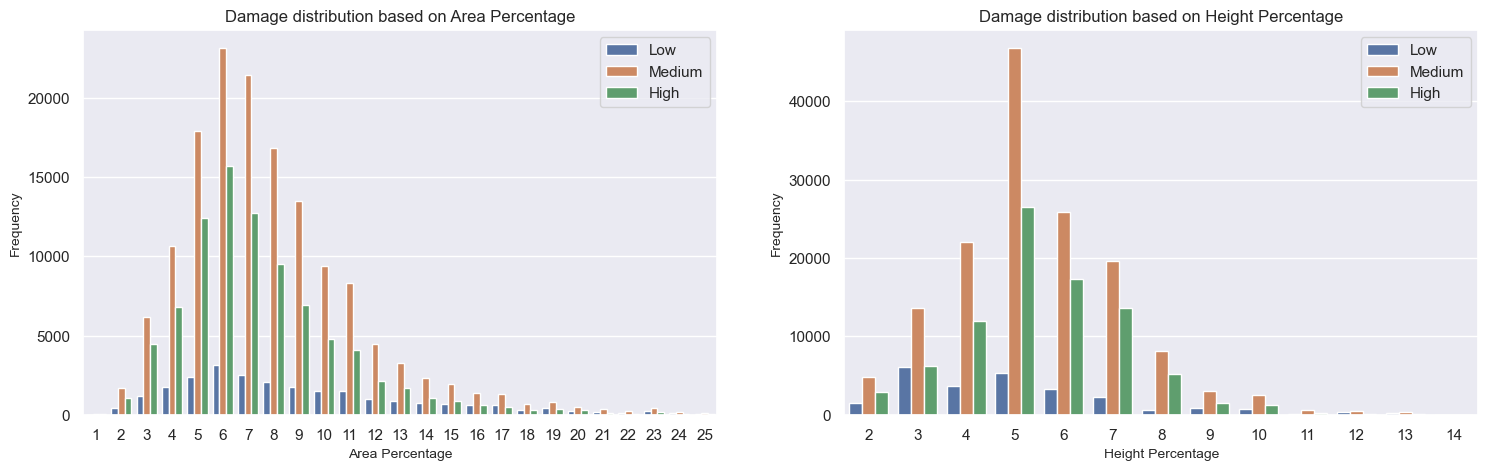

In [45]:
fig = plt.figure(figsize=(18,5))

area_segment = train[train['area_percentage'] <= 25]
height_segment = train[train['height_percentage'] <= 14]

area_height_col = ['area_percentage', 'height_percentage']
area_height_segment = [area_segment, height_segment]
area_height_label = ['Area', 'Height']


for i in range(1,3):
    plt.subplot(int(f'12{i}'))
    sb.countplot(data = train, x = area_height_segment[i-1][area_height_col[i-1]], hue=area_height_segment[i-1]['damage_group'], hue_order=['Low', 'Medium', 'High'])
    plt.xlabel(f'{area_height_label[i-1]} Percentage', fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.title(f'Damage distribution based on {area_height_label[i-1]} Percentage')
    plt.legend(loc='upper right')
plt.show()

#### Divide data into NUMERIC and CATEGORICAL

In [46]:
df = building_damage.drop(['has_secondary_use', 'has_secondary_use_agriculture'], axis = 1).copy()
df = df.set_index('building_id')
df['damage_grade'] = df['damage_grade'].astype('int64')
dfnumeric = df.select_dtypes(include=['int64', 'float64'])
dfcategorical = df.select_dtypes(include=['object'])

dfnumeric.info()
dfcategorical = pd.get_dummies(dfcategorical)
dfcategorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 802906 to 747594
Data columns (total 29 columns):
 #   Column                                  Non-Null Count   Dtype
---  ------                                  --------------   -----
 0   geo_level_1_id                          260601 non-null  int64
 1   geo_level_2_id                          260601 non-null  int64
 2   geo_level_3_id                          260601 non-null  int64
 3   count_floors_pre_eq                     260601 non-null  int64
 4   age                                     260601 non-null  int64
 5   area_percentage                         260601 non-null  int64
 6   height_percentage                       260601 non-null  int64
 7   has_superstructure_adobe_mud            260601 non-null  int64
 8   has_superstructure_mud_mortar_stone     260601 non-null  int64
 9   has_superstructure_stone_flag           260601 non-null  int64
 10  has_superstructure_cement_mortar_stone  260601 non-null  int64


From this info, we can use SelectKBest with k=38

#### Determine Best Categorical Variables - by SelectKBest

In [49]:
#We use Chi2score>100 and k=38
category_rank_feature = SelectKBest(score_func=chi2, k=38)
rank_feature = category_rank_feature.fit(dfcategorical, building_damage['damage_grade'])
rank_feature.scores_

array([3.14202700e+02, 6.77046429e+01, 6.77640172e+01, 4.15860728e+02,
       2.79293047e+04, 6.39195232e+03, 5.49424844e+03, 8.31579458e+03,
       1.04584801e+03, 1.15697625e+03, 2.80485950e+04, 3.68489235e+03,
       9.75543604e+01, 3.24654211e+04, 6.05516649e+01, 1.22429528e+02,
       7.42291993e+03, 5.10846128e+03, 1.85494082e+04, 4.06602490e+02,
       2.59354872e+02, 1.48779877e+02, 4.93714399e+01, 6.22421247e+02,
       1.09200110e+02, 1.50572497e+02, 3.04753264e+01, 3.34305427e+00,
       1.36435198e+01, 1.65187836e+00, 5.72019260e+01, 3.23110604e+02,
       3.31565900e+01, 1.01176162e+03, 2.26362245e+03, 5.34417037e+01,
       3.96056239e+01, 2.29493063e+02])

In [52]:
cat_score = pd.DataFrame(rank_feature.scores_, columns=['Score'])
cat_col = pd.DataFrame(dfcategorical.columns, columns=['Feature'])
univariate_cat_rank = pd.concat([cat_col, cat_score], axis=1)
univariate_cat_rank.set_index('Feature', inplace=True)
sorted_univariate_cat_rank = univariate_cat_rank.sort_values('Score', ascending=False)

In [53]:
chi2_greater100 = sorted_univariate_cat_rank[sorted_univariate_cat_rank['Score']>100]
chi2_greater100

,Score
Feature,
ground_floor_type_v,32465.421066
roof_type_x,28048.595012
foundation_type_i,27929.304672
other_floor_type_s,18549.408221
foundation_type_w,8315.794578
other_floor_type_j,7422.919931
foundation_type_r,6391.952318
foundation_type_u,5494.248443
other_floor_type_q,5108.461280


#### Combine both numeric and categorical variables into a new dataframe

In [60]:
df_new = pd.concat([dfnumeric, dfcategorical], axis=1)
df_new['damage_grade'] = df_new['damage_grade'].astype('category')

In [61]:
df_new.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,1,1,0,...,0,0,0,0,0,0,0,0,1,0
28830,8,900,2812,2,10,8,7,0,1,0,...,0,0,0,0,0,0,0,0,1,0
94947,21,363,8973,2,10,5,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
590882,22,418,10694,2,10,6,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
201944,11,131,1488,3,30,8,9,1,0,0,...,0,0,0,0,0,0,0,0,1,0


### MAKE TRAIN AND TEST DATA

In [64]:
from sklearn.model_selection import train_test_split
data = df_new.copy()
df_num_without_damage_grade = dfnumeric.drop(['damage_grade'], axis = 1)

y = data['damage_grade']
X = data[list(df_num_without_damage_grade.columns)+list(chi2_greater100.index)]

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((195450, 53), (65151, 53), (195450,), (65151,))

In [66]:
display(data.shape)
display(data.head())

(260601, 67)

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,1,1,0,...,0,0,0,0,0,0,0,0,1,0
28830,8,900,2812,2,10,8,7,0,1,0,...,0,0,0,0,0,0,0,0,1,0
94947,21,363,8973,2,10,5,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
590882,22,418,10694,2,10,6,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
201944,11,131,1488,3,30,8,9,1,0,0,...,0,0,0,0,0,0,0,0,1,0


The datas are ready to be analyzed using machine learning models.